In [1]:
from imports import *

# NOTE: Additional path needed for Offline Releases < V05-07
###sys.path.append("/home/kelsey/software/supersim/CDMSpython")
import dmc

%matplotlib inline
# NOTE: The "%..." directives must be directly in the notebook

Welcome to JupyROOT 6.28/10


In [2]:
# Several input files useful for testing
datadir = "data/Luke_debugging/"
maxL100k = datadir+"10keV-Luke100000-E100eV_51250127_000000.root"
maxLinf  = datadir+"10keV-Luke-1-E100eV_51250127_000000.root"
maxL30M  = datadir+"10keV-Luke30000000-E100eV_51250127_000000.root"
maxL300k = datadir+"10keV-Luke300000-E100eV_51250127_000000.root"
maxL10k1keV = datadir+"10keV-Luke10000-E1keV_51250128_000000.root"

# --------------------------------------------------------------------------
# Overlay all the events, if possible
event = 0

In [3]:
def TEStiles(file,outname,title):
    """Make 4x3 tiled set of HV100mm TES channel plots."""
    fig, axes = subplots(3,4,figsize=(9,6), dpi = 200)
    fig.set_tight_layout(True)

    reader = dmc.traceReader(file)
    chans = reader.channels("TES")
    bins = reader.timeBins("TES")

    for chan in range(12):
        currentAxis = axes.flatten()[chan]
    
        # Get TES trace for plotting
        trace = reader.TES(event, chan)
        currentAxis.plot(bins, trace, lw=1, color = 'C0', label=chans[chan])
    
        currentAxis.set_xlim([-100.,2000.])
        currentAxis.set_xlabel("Time [\u03BCs]")
        currentAxis.set_ylabel("Trace [\u03BCA]")
        currentAxis.legend()     # Puts channel name inside box

    fig.suptitle(title)
    fig.savefig(outname+".png")

In [4]:
def TESoverlay(file,outname,title):
    """Make single plot showing all 12 HV100mm TES channels."""
    fig = plt.figure(figsize=(6,4),dpi=200)

    reader = dmc.traceReader(file)
    bins = reader.timeBins("TES")
    chans,traces = reader.plottableTES(event)

    currentAxis = plt.gca()
    currentAxis.plot(bins,traces,lw=1,label=chans)
    
    currentAxis.set_xlim([-100.,2000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.legend()     # Puts channel name inside box
    fig.suptitle(title)
    fig.savefig(outname+".png")

Error in <TChain::LoadTree>: Cannot find tree with name G4SimDir/g4dmcFET in file data/Luke_debugging/10keV-Luke100000-E100eV_51250127_000000.root


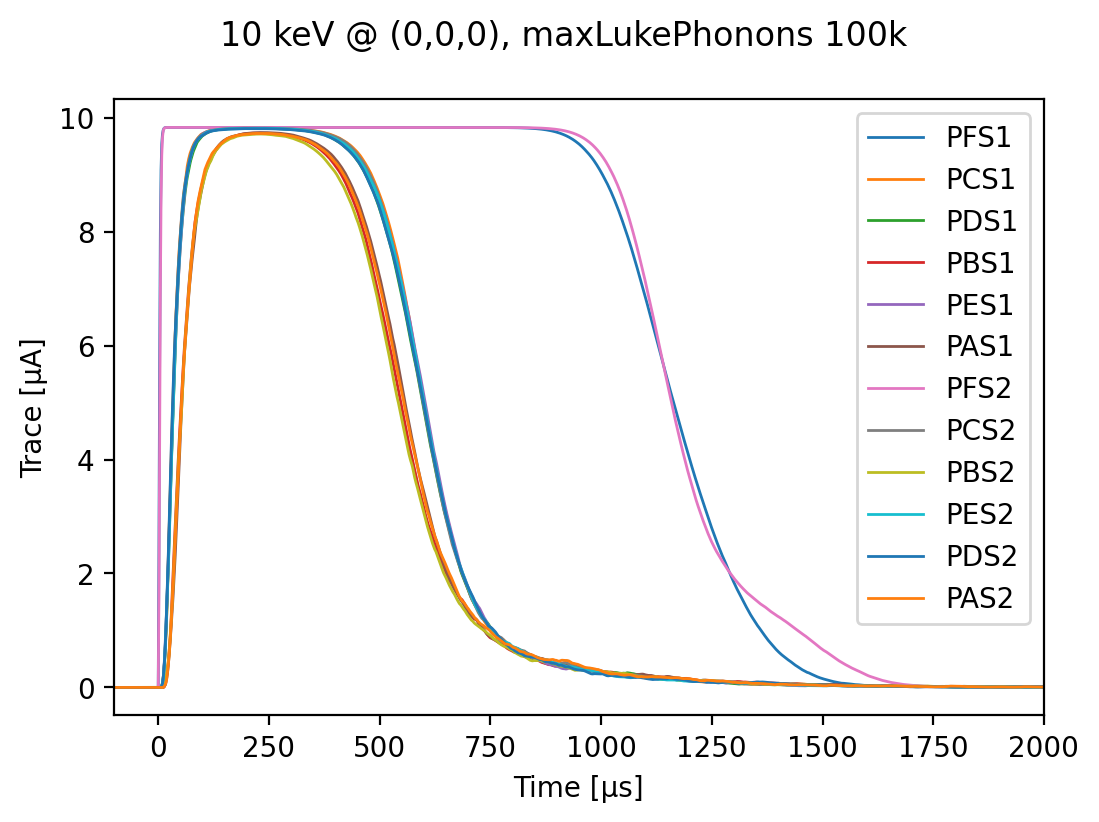

In [5]:
TESoverlay(maxL100k,"maxLuke100k","10 keV @ (0,0,0), maxLukePhonons 100k")

Error in <TChain::LoadTree>: Cannot find tree with name G4SimDir/g4dmcFET in file data/Luke_debugging/10keV-Luke300000-E100eV_51250127_000000.root
Error in <TChain::LoadTree>: Cannot find tree with name G4SimDir/g4dmcFET in file data/Luke_debugging/10keV-Luke300000-E100eV_51250127_000000.root


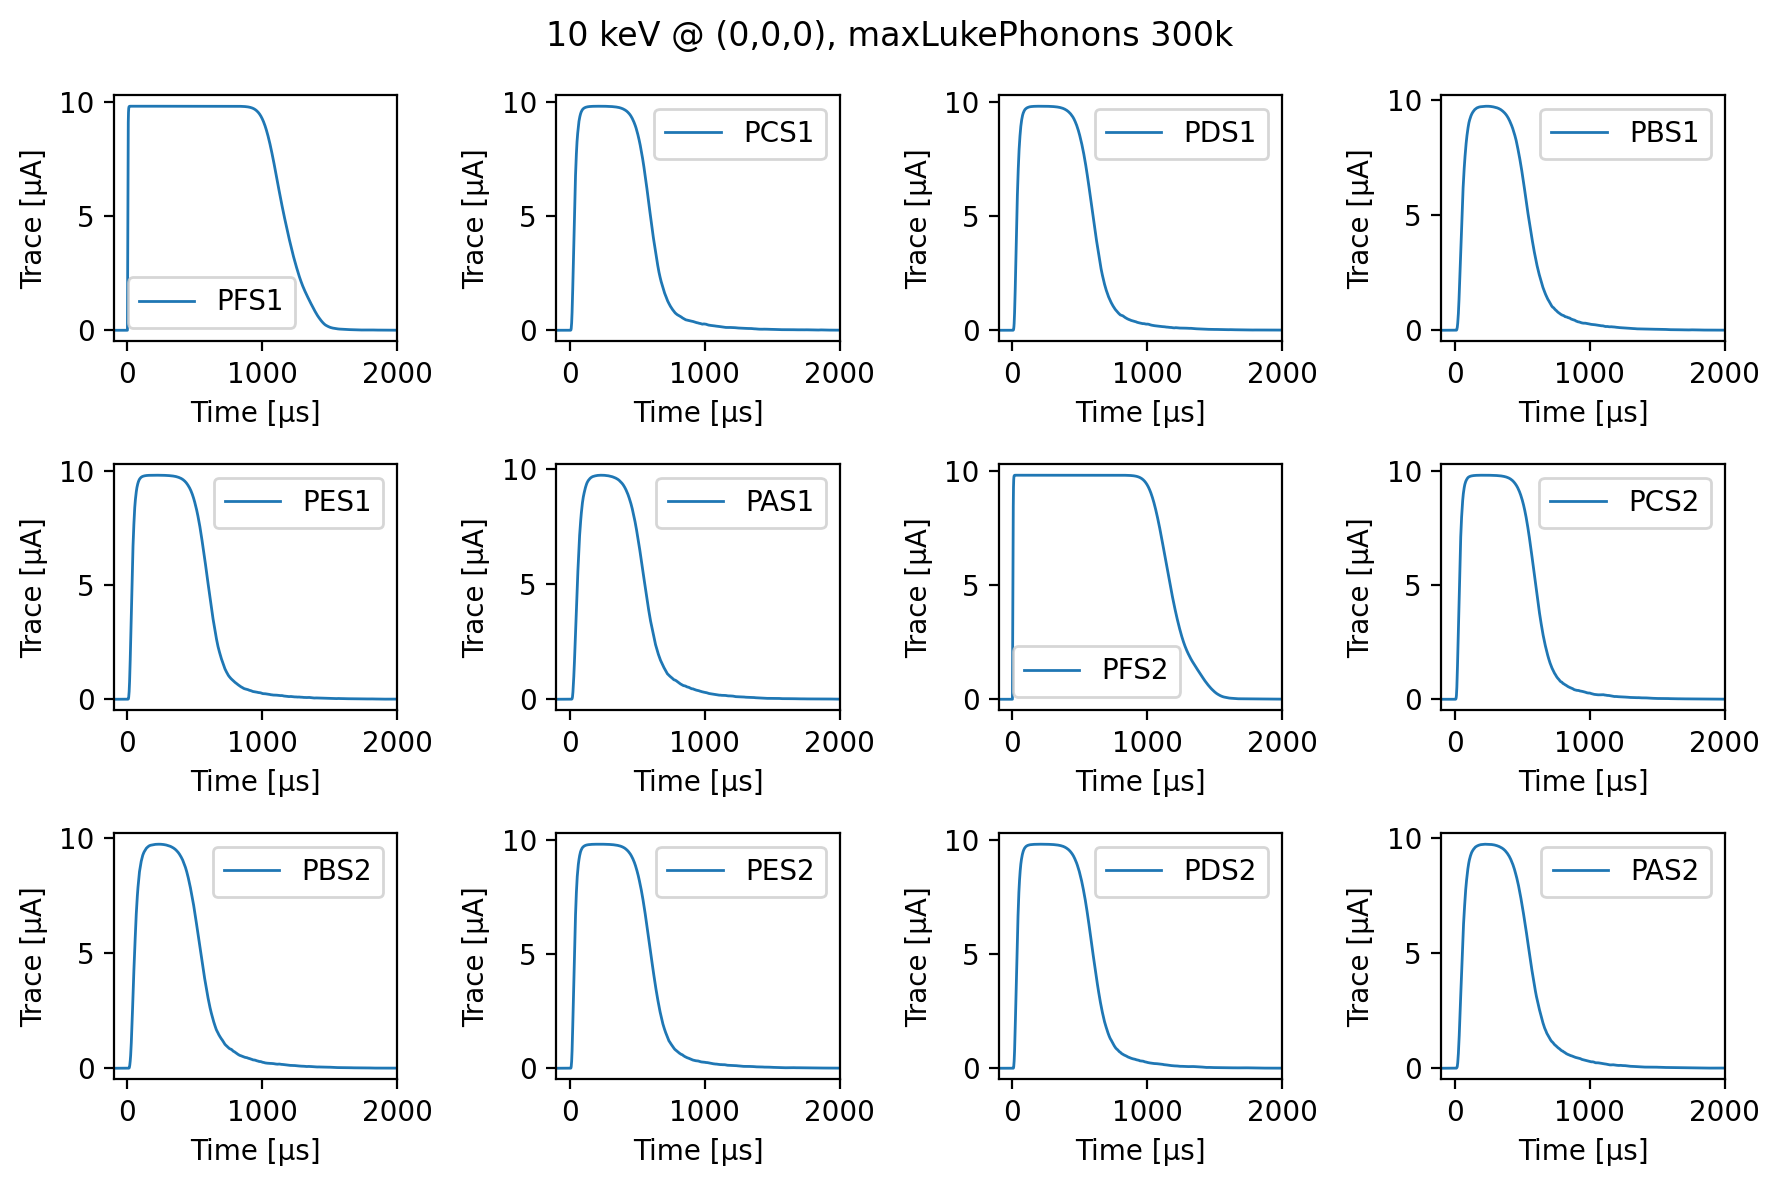

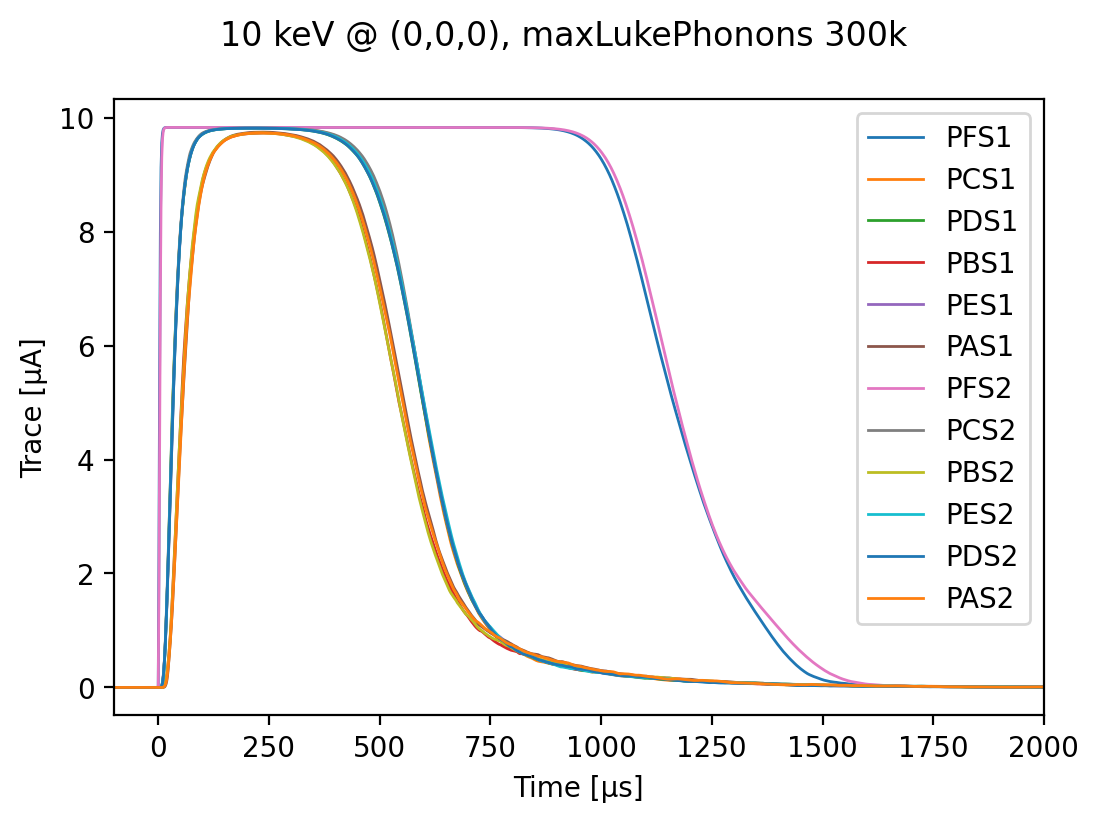

In [40]:
TEStiles(maxL300k,"maxLuke-300k_tile","10 keV @ (0,0,0), maxLukePhonons 300k")
TESoverlay(maxL300k,"maxLuke-300k_over","10 keV @ (0,0,0), maxLukePhonons 300k")